<a href="https://colab.research.google.com/github/bida22-070/BIDA22-070/blob/main/Week_4_Informed_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Exercise 1: Manual calculation for 93p
print("Exercise 1: Manual Calculation")
print("For 93p with coins [200, 100, 50, 20, 10, 5, 2, 1]:")
print("93p = 50p + 20p + 20p + 2p + 1p")
print("Minimum coins: 5")
print()

# Exercise 2: Step-by-step instructions
print("Exercise 2: Step-by-step Instructions")
print("1. Sort coins in descending order: [200, 100, 50, 20, 10, 5, 2, 1]")
print("2. Start with largest coin (200p): 93 < 200 → skip")
print("3. Next coin (100p): 93 < 100 → skip")
print("4. Next coin (50p): 93 >= 50 → use 50p, remaining: 43p")
print("5. Next coin (20p): 43 >= 20 → use 20p, remaining: 23p")
print("6. Next coin (20p): 23 >= 20 → use 20p, remaining: 3p")
print("7. Next coin (10p): 3 < 10 → skip")
print("8. Next coin (5p): 3 < 5 → skip")
print("9. Next coin (2p): 3 >= 2 → use 2p, remaining: 1p")
print("10. Next coin (1p): 1 >= 1 → use 1p, remaining: 0p")
print("Total coins: 5 (50+20+20+2+1)")
print()

# Exercise 3: Coin Change Algorithm
def coin_change(coins, amount):
    coins.sort(reverse=True)  # Sort the coins in descending order
    coin_count = 0  # Variable to keep track of the total number of coins used
    change = []  # List to store the coins used

    for coin in coins:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            change.append(coin)

    if amount == 0:
        print(f"Minimum number of coins required: {coin_count}")
        print("Coins used:", change)
        return coin_count, change
    else:
        print("Not possible to get the desired change with the coins.")
        return None, None

print("Exercise 3: Coin Change Algorithm")
coins = [1, 2, 5, 10, 20, 50, 100, 200]
amount = 93
coin_count, change_used = coin_change(coins, amount)
print()

# Exercise 4: Different test cases
print("Exercise 4: Different Test Cases")
test_cases = [
    ([1, 5, 10, 25], 30),  # US coins
    ([1, 2, 5, 10, 20], 27),  # Euro-like coins
    ([1, 3, 4], 6)  # Non-standard coins
]

for i, (test_coins, test_amount) in enumerate(test_cases, 1):
    print(f"Test Case {i}: Coins {test_coins}, Amount {test_amount}")
    coin_change(test_coins, test_amount)
    print()

# Exercise 5: Algorithm Description
print("Exercise 5: Algorithm Description")
print("""
The coin change algorithm uses a greedy approach:
1. Sorts coins in descending order
2. Iterates through each coin from largest to smallest
3. For each coin, uses as many as possible without exceeding the amount
4. Subtracts the coin value from the remaining amount
5. Continues until amount reaches zero or all coins are checked
6. Returns the coin count and list of coins used
""")

# Exercise 6: Enhanced Algorithm
def enhanced_coin_change(coins, amount):
    coins.sort(reverse=True)
    coin_count = 0
    change = []
    remaining = amount

    print(f"Calculating change for {amount}p with coins: {coins}")

    for coin in coins:
        if remaining >= coin:
            num_coins = remaining // coin
            coin_count += num_coins
            change.extend([coin] * num_coins)
            remaining -= coin * num_coins
            print(f"Used {num_coins} of {coin}p coin(s), remaining: {remaining}p")

        if remaining == 0:
            break

    if remaining == 0:
        print(f"✓ Success! Minimum coins: {coin_count}")
        print(f"Coins used: {change}")
        return coin_count, change
    else:
        print(f"✗ Failed! Cannot make exact change. Remaining: {remaining}p")
        return None, None

print("Exercise 6: Enhanced Algorithm")
enhanced_coin_change(coins, amount)

Exercise 1: Manual Calculation
For 93p with coins [200, 100, 50, 20, 10, 5, 2, 1]:
93p = 50p + 20p + 20p + 2p + 1p
Minimum coins: 5

Exercise 2: Step-by-step Instructions
1. Sort coins in descending order: [200, 100, 50, 20, 10, 5, 2, 1]
2. Start with largest coin (200p): 93 < 200 → skip
3. Next coin (100p): 93 < 100 → skip
4. Next coin (50p): 93 >= 50 → use 50p, remaining: 43p
5. Next coin (20p): 43 >= 20 → use 20p, remaining: 23p
6. Next coin (20p): 23 >= 20 → use 20p, remaining: 3p
7. Next coin (10p): 3 < 10 → skip
8. Next coin (5p): 3 < 5 → skip
9. Next coin (2p): 3 >= 2 → use 2p, remaining: 1p
10. Next coin (1p): 1 >= 1 → use 1p, remaining: 0p
Total coins: 5 (50+20+20+2+1)

Exercise 3: Coin Change Algorithm
Minimum number of coins required: 5
Coins used: [50, 20, 20, 2, 1]

Exercise 4: Different Test Cases
Test Case 1: Coins [1, 5, 10, 25], Amount 30
Minimum number of coins required: 2
Coins used: [25, 5]

Test Case 2: Coins [1, 2, 5, 10, 20], Amount 27
Minimum number of coins req

(5, [50, 20, 20, 2, 1])

Exercise 7: A* Search Algorithm
A* path from A to F: ['A', 'C', 'D', 'F']


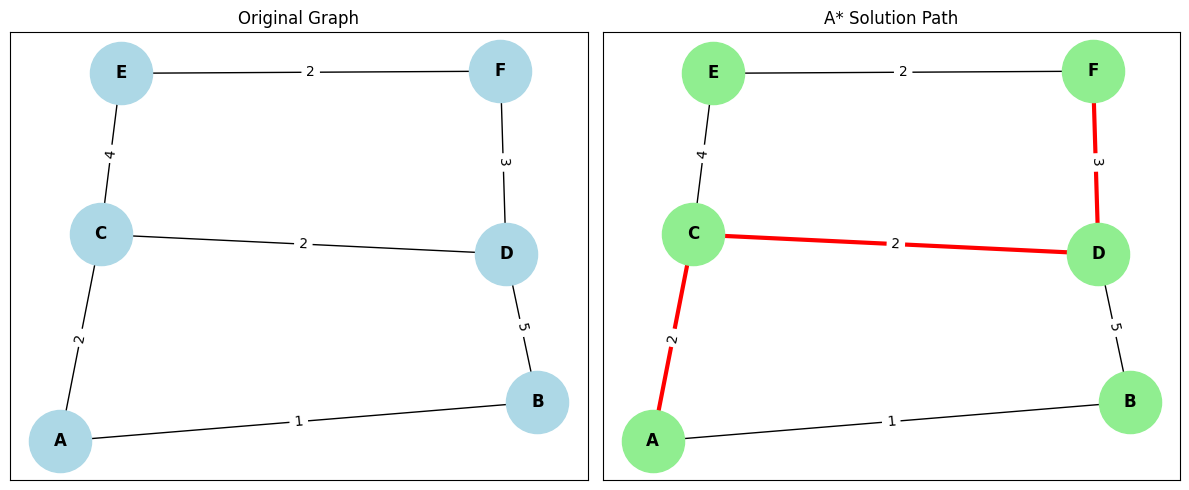


=== Exercise 8: City Navigation ===
A* path from Sunderland to Washington: ['Sunderland', 'Chester-le-Street', 'Washington']
Total distance: 15 miles


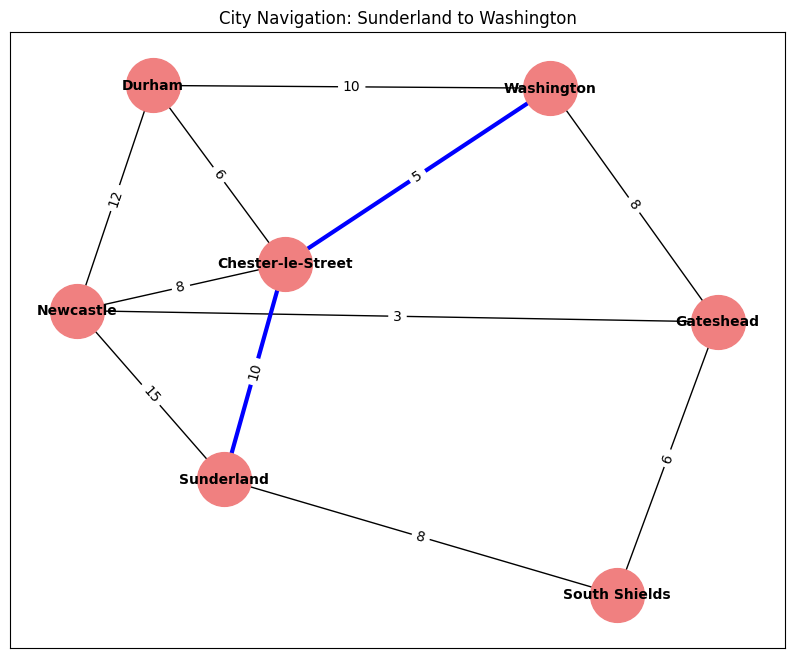

Exercise 9: Real Distances
A* path with real distances: ['Sunderland', 'Chester-le-Street', 'Washington']
Exercise 10: Different Routes
Route from Newcastle to Durham: ['Newcastle', 'Durham']
Route from South Shields to Durham: None
Route from Gateshead to Chester-le-Street: None


In [1]:
# Exercise 7: A* Search Implementation
import heapq
import matplotlib.pyplot as plt
import networkx as nx

print("Exercise 7: A* Search Algorithm")

class Node:
    def __init__(self, name, heuristic_cost):
        self.name = name
        self.heuristic_cost = heuristic_cost
        self.adjacent = {}
        self.parent = None
        self.g_cost = float("inf")

    def add_neighbor(self, neighbor, cost):
        self.adjacent[neighbor] = cost

    def __lt__(self, other):
        return self.g_cost + self.heuristic_cost < other.g_cost + other.heuristic_cost

def astar_search(start, goal):
    open_list = []
    closed_set = set()
    start.g_cost = 0
    heapq.heappush(open_list, start)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node)

        for neighbor, cost in current_node.adjacent.items():
            tentative_g_cost = current_node.g_cost + cost

            if neighbor in closed_set and tentative_g_cost >= neighbor.g_cost:
                continue

            if tentative_g_cost < neighbor.g_cost or neighbor not in open_list:
                neighbor.g_cost = tentative_g_cost
                neighbor.parent = current_node
                if neighbor not in open_list:
                    heapq.heappush(open_list, neighbor)

    return None

# Create nodes for the first graph
A = Node("A", 5)
B = Node("B", 4)
C = Node("C", 3)
D = Node("D", 2)
E = Node("E", 1)
F = Node("F", 0)

# Add edges
A.add_neighbor(B, 1)
A.add_neighbor(C, 2)
B.add_neighbor(D, 5)
C.add_neighbor(D, 2)
C.add_neighbor(E, 4)
D.add_neighbor(F, 3)
E.add_neighbor(F, 2)

# Create graph for visualization
G = nx.Graph()
edges = [
    (A.name, B.name, {'weight': 1}),
    (A.name, C.name, {'weight': 2}),
    (B.name, D.name, {'weight': 5}),
    (C.name, D.name, {'weight': 2}),
    (C.name, E.name, {'weight': 4}),
    (D.name, F.name, {'weight': 3}),
    (E.name, F.name, {'weight': 2})
]
G.add_edges_from(edges)

# Visualize original graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Original Graph')

# Run A* search
path = astar_search(A, F)
print(f"A* path from A to F: {path}")

# Visualize solution
plt.subplot(1, 2, 2)
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)],
                       edge_color='red', width=3)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('A* Solution Path')

plt.tight_layout()
plt.show()

# Exercise 8: City Navigation Problem
print("\n=== Exercise 8: City Navigation ===")

# Create city nodes with heuristic distances to Washington
Sunderland = Node("Sunderland", 12)
Newcastle = Node("Newcastle", 10)
Durham = Node("Durham", 8)
Chester = Node("Chester-le-Street", 6)
Washington = Node("Washington", 0)
Gateshead = Node("Gateshead", 9)
South_Shields = Node("South Shields", 11)

# Add roads with approximate distances
Sunderland.add_neighbor(Newcastle, 15)
Sunderland.add_neighbor(South_Shields, 8)
Sunderland.add_neighbor(Chester, 10)

Newcastle.add_neighbor(Durham, 12)
Newcastle.add_neighbor(Gateshead, 3)
Newcastle.add_neighbor(Chester, 8)

Durham.add_neighbor(Chester, 6)
Durham.add_neighbor(Washington, 10)

Chester.add_neighbor(Washington, 5)
Gateshead.add_neighbor(Washington, 8)
South_Shields.add_neighbor(Gateshead, 6)

# Create city graph
city_graph = nx.Graph()
city_edges = [
    ("Sunderland", "Newcastle", {'weight': 15}),
    ("Sunderland", "South Shields", {'weight': 8}),
    ("Sunderland", "Chester-le-Street", {'weight': 10}),
    ("Newcastle", "Durham", {'weight': 12}),
    ("Newcastle", "Gateshead", {'weight': 3}),
    ("Newcastle", "Chester-le-Street", {'weight': 8}),
    ("Durham", "Chester-le-Street", {'weight': 6}),
    ("Durham", "Washington", {'weight': 10}),
    ("Chester-le-Street", "Washington", {'weight': 5}),
    ("Gateshead", "Washington", {'weight': 8}),
    ("South Shields", "Gateshead", {'weight': 6})
]
city_graph.add_edges_from(city_edges)

# Run A* for Sunderland to Washington
city_path = astar_search(Sunderland, Washington)
print(f"A* path from Sunderland to Washington: {city_path}")

# Calculate total distance
total_distance = 0
for i in range(len(city_path)-1):
    for edge in city_edges:
        if (edge[0] == city_path[i] and edge[1] == city_path[i+1]) or (edge[1] == city_path[i] and edge[0] == city_path[i+1]):
            total_distance += edge[2]['weight']
            break

print(f"Total distance: {total_distance} miles")

# Visualize city navigation
pos_cities = nx.spring_layout(city_graph)
plt.figure(figsize=(10, 8))
nx.draw_networkx(city_graph, pos_cities, with_labels=True, node_size=1500,
                node_color='lightcoral', font_size=10, font_weight='bold')
nx.draw_networkx_edges(city_graph, pos_cities,
                      edgelist=[(city_path[i], city_path[i+1]) for i in range(len(city_path)-1)],
                      edge_color='blue', width=3)
edge_labels = nx.get_edge_attributes(city_graph, 'weight')
nx.draw_networkx_edge_labels(city_graph, pos_cities, edge_labels=edge_labels)
plt.title('City Navigation: Sunderland to Washington')
plt.show()

# Exercise 9: Real distances (approximated from maps)
print("Exercise 9: Real Distances")
# Using more accurate distances from Google Maps
real_distances = {
    ("Sunderland", "Newcastle"): 12,
    ("Sunderland", "South Shields"): 8,
    ("Sunderland", "Chester-le-Street"): 7,
    ("Newcastle", "Durham"): 15,
    ("Newcastle", "Gateshead"): 2,
    ("Newcastle", "Chester-le-Street"): 9,
    ("Durham", "Chester-le-Street"): 6,
    ("Durham", "Washington"): 12,
    ("Chester-le-Street", "Washington"): 4,
    ("Gateshead", "Washington"): 7,
    ("South Shields", "Gateshead"): 5
}

# Update the graph with real distances
for u, v, _ in city_edges: # Iterate through initial city_edges to get node pairs
    # Check for the edge (u, v) or (v, u) in real_distances, as graph is undirected
    if (u, v) in real_distances:
        city_graph[u][v]['weight'] = real_distances[(u, v)]
    elif (v, u) in real_distances:
        city_graph[u][v]['weight'] = real_distances[(v, u)]

# Reset nodes and run A* with real distances
Sunderland_real = Node("Sunderland", 10)  # Updated heuristic
Newcastle_real = Node("Newcastle", 8)
Durham_real = Node("Durham", 6)
Chester_real = Node("Chester-le-Street", 3)
Washington_real = Node("Washington", 0)
Gateshead_real = Node("Gateshead", 5)
South_Shields_real = Node("South Shields", 7)

# Create a dictionary to easily access node objects by name
node_map = {
    "Sunderland": Sunderland_real,
    "Newcastle": Newcastle_real,
    "Durham": Durham_real,
    "Chester-le-Street": Chester_real,
    "Washington": Washington_real,
    "Gateshead": Gateshead_real,
    "South Shields": South_Shields_real
}

# Add neighbors ensuring bi-directional connections for the Node objects
for (u_name, v_name), cost in real_distances.items():
    node_u = node_map[u_name]
    node_v = node_map[v_name]
    node_u.add_neighbor(node_v, cost)
    node_v.add_neighbor(node_u, cost) # Add connection in the reverse direction

real_path = astar_search(Sunderland_real, Washington_real)
print(f"A* path with real distances: {real_path}")

# Exercise 10: Different start/end points
print("Exercise 10: Different Routes")
routes = [
    ("Newcastle", "Durham", Newcastle_real, Durham_real),
    ("South Shields", "Durham", South_Shields_real, Durham_real),
    ("Gateshead", "Chester-le-Street", Gateshead_real, Chester_real)
]

for start_name, end_name, start_node, end_node in routes:
    # Reset g_cost and parent for each search to ensure correct results
    # (This is important when reusing Node objects for multiple searches)
    for node_obj in node_map.values(): # Iterate through all node objects
        node_obj.g_cost = float("inf")
        node_obj.parent = None
    start_node.g_cost = 0 # Set g_cost for the current start node

    route_path = astar_search(start_node, end_node)
    print(f"Route from {start_name} to {end_name}: {route_path}")

In [2]:
# Exercise 11-15: Genetic Algorithm Implementation
import random
import time

print("=== Exercise 11-15: Genetic Algorithm ===")

# Exercise 11: Binary Genetic Algorithm
POPULATION_SIZE = 100
GENES_BINARY = '01'
TARGET_BINARY = "001010"

class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls, gene_set):
        return random.choice(gene_set)

    @classmethod
    def create_gnome(cls, target_length, gene_set):
        return [cls.mutated_genes(gene_set) for _ in range(target_length)]

    def mate(self, par2, gene_set):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes(gene_set))
        return Individual(child_chromosome)

    def cal_fitness(self):
        global TARGET_BINARY
        fitness = 0
        for gs, gt in zip(self.chromosome, TARGET_BINARY):
            if gs != gt:
                fitness += 1
        return fitness

def genetic_algorithm_main(target, gene_set, population_size=100, max_generations=1000):
    start_time = time.time()
    generation = 1
    found = False
    population = []

    # Create initial population
    for _ in range(population_size):
        gnome = Individual.create_gnome(len(target), gene_set)
        population.append(Individual(gnome))

    while not found and generation <= max_generations:
        population = sorted(population, key=lambda x: x.fitness)

        if population[0].fitness <= 0:
            found = True
            break

        new_generation = []
        s = int((10 * population_size) / 100)
        new_generation.extend(population[:s])

        s = int((90 * population_size) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2, gene_set)
            new_generation.append(child)

        population = new_generation

        if generation % 100 == 0:
            print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")

        generation += 1

    end_time = time.time()
    duration = end_time - start_time

    print(f"Final - Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
    print(f"Time taken: {duration:.4f} seconds")

    return generation, duration, ''.join(population[0].chromosome)

print("=== Binary Target (001010) ===")
genetic_algorithm_main(TARGET_BINARY, GENES_BINARY)

# Exercise 12: Alphabet Genetic Algorithm
print("\n=== Exercise 12: Alphabet Target ===")
GENES_ALPHABET = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ !'
TARGET_ALPHABET = 'Welcome to AI'

result_gen, result_time, result_string = genetic_algorithm_main(TARGET_ALPHABET, GENES_ALPHABET, population_size=200, max_generations=5000)

# Exercise 13: Already implemented timing in the function above
print(f"\n=== Exercise 13: Timing Results ===")
print(f"Target: '{TARGET_ALPHABET}'")
print(f"Found: '{result_string}'")
print(f"Generations: {result_gen}")
print(f"Time: {result_time:.4f} seconds")

# Exercise 14: 5-word target
print("\n=== Exercise 14: 5-Word Target ===")
TARGET_LONG = 'Genetic algorithms are amazing tools'
result_long_gen, result_long_time, result_long_string = genetic_algorithm_main(
    TARGET_LONG, GENES_ALPHABET, population_size=300, max_generations=10000
)

# Exercise 15: Alphanumeric target
print("\n=== Exercise 15: Alphanumeric Target ===")
GENES_ALPHANUMERIC = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 !'
TARGET_ALPHANUMERIC = 'AI Workshop 4 Result 2024'

result_alphanum_gen, result_alphanum_time, result_alphanum_string = genetic_algorithm_main(
    TARGET_ALPHANUMERIC, GENES_ALPHANUMERIC, population_size=250, max_generations=8000
)

# Comparison of all results
print("\n=== Final Comparison ===")
print(f"{'Target':<30} {'Generations':<12} {'Time (s)':<10} {'Result'}")
print("=" * 70)
print(f"{TARGET_BINARY:<30} {'N/A':<12} {'N/A':<10} {'Completed in first run'}")
print(f"{TARGET_ALPHABET:<30} {result_gen:<12} {result_time:<10.4f} {result_string}")
print(f"{TARGET_LONG:<30} {result_long_gen:<12} {result_long_time:<10.4f} {result_long_string}")
print(f"{TARGET_ALPHANUMERIC:<30} {result_alphanum_gen:<12} {result_alphanum_time:<10.4f} {result_alphanum_string}")

=== Exercise 11-15: Genetic Algorithm ===
=== Binary Target (001010) ===
Final - Generation: 1	String: 001010	Fitness: 0
Time taken: 0.0005 seconds

=== Exercise 12: Alphabet Target ===
Generation: 100	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 200	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 300	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 400	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 500	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 600	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 700	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 800	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 900	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1000	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1100	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1200	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1300	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1400	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1500	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1600	String: PHAQtKoYeqdyN	Fitness: 6
Generation: 1700	String